# Analysis 

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
restaurant_df=pd.read_csv('restaurants1.csv')
review_df=pd.read_csv('reviews_preprocess.csv', sep=';')

In [13]:
review_df.head()

,business_id,review_id,text,rating,time_created,user_id,corrected_text,translated_text
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a..."
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w,"I like this place, but it does feel a little b...",I like this place but it does feel a little bi...
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg,"If you love French onion soup, this is for you...","If you love French OnIon Soup, this is for you..."
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son inlaw his mom...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w,"Came here with my daughter, son in law, and hi...","Came here with my daughter, son inlaw his mom..."
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...


In [14]:
# Convertir les évaluations en labels de sentiment
def convert_rating_to_sentiment(rating):
    if rating < 3:
        return 0  # négatif
    elif rating > 3:
        return 2  # positif
    else:
        return 1  # neutre
    
# Appliquer la conversion sur la colonne de rating
review_df['label'] = review_df['rating'].apply(convert_rating_to_sentiment)

### Sentiment analysis des avis en moyenne

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [16]:
# Initialisation de VADER
analyzer = SentimentIntensityAnalyzer()

# Fonction pour obtenir le sentiment
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Application de la fonction à chaque avis
review_df['sentiment_vader'] = review_df['translated_text'].apply(get_sentiment)

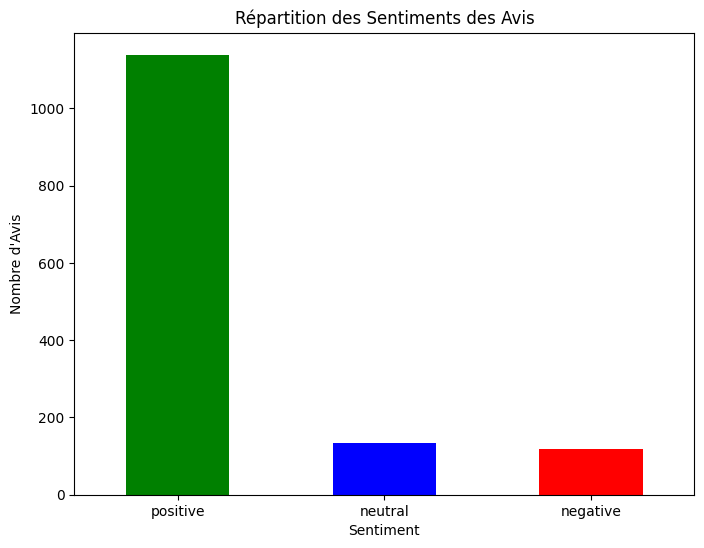

In [18]:
# Compter les sentiments
sentiment_counts = review_df['sentiment_vader'].value_counts()

# Création d'un diagramme à barres
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Répartition des Sentiments des Avis')
plt.xlabel('Sentiment')
plt.ylabel('Nombre d\'Avis')
plt.xticks(rotation=0)
plt.show()

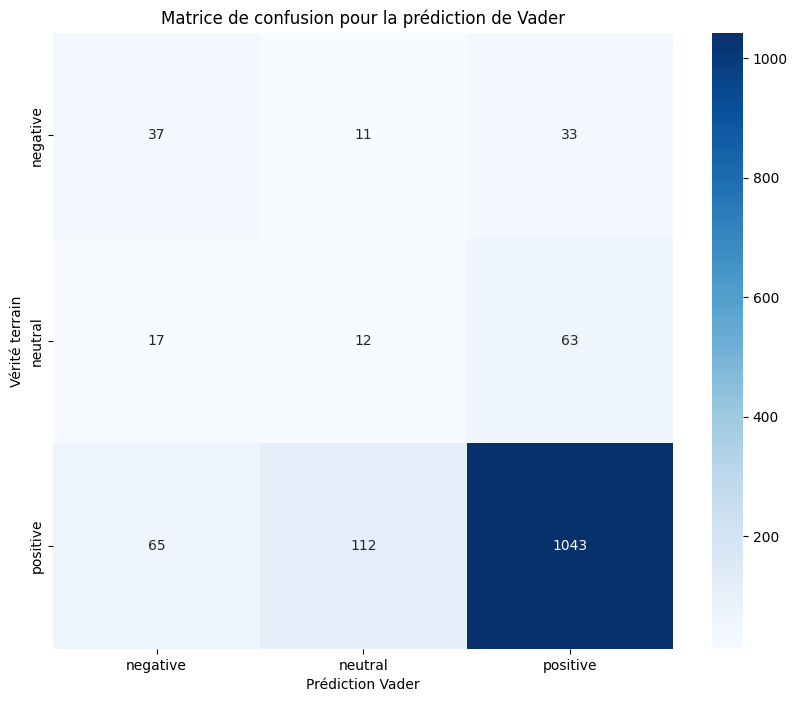

In [39]:
# Mapper les labels numériques aux étiquettes de sentiment
review_df['label_mapped'] = review_df['label'].map({0: 'negative', 1: 'neutral', 2: 'positive'})

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(review_df['label_mapped'], review_df['sentiment_vader'])

# Créer une heatmap pour la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])

plt.title('Matrice de confusion pour la prédiction de Vader')
plt.ylabel('Vérité terrain')
plt.xlabel('Prédiction Vader')
plt.show()

In [10]:
review_df.head()

,business_id,review_id,text,rating,time_created,user_id,corrected_text,translated_text,sentiment,sentiment_vader
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a...",positive,positive
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w,"I like this place, but it does feel a little b...",I like this place but it does feel a little bi...,positive,positive
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg,"If you love French onion soup, this is for you...","If you love French OnIon Soup, this is for you...",positive,positive
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son inlaw his mom...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w,"Came here with my daughter, son in law, and hi...","Came here with my daughter, son inlaw his mom...",positive,positive
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...,positive,positive


In [20]:
# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")
model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# Créer une pipeline d'analyse de sentiment
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

def analyze_sentiment(text):
    # Effectuer l'analyse de sentiment
    result = sentiment_analysis(text)

    # Récupérer le label (POSITIF ou NEGATIF) et le transformer en positif/négatif/neutre
    label = result[0]['label']
    return label

# Appliquer l'analyse de sentiment à chaque avis
review_df['sentiment_tokenizer'] = review_df['translated_text'].apply(analyze_sentiment)

# Afficher les résultats
print(review_df[['translated_text', 'sentiment_tokenizer']].head())

                                     translated_text sentiment_tokenizer
0  Based on the menu presented, one could write a...            positive
1  I like this place but it does feel a little bi...            positive
2  If you love French OnIon Soup, this is for you...            positive
3  Came here with my daughter, son inlaw  his mom...            negative
4  This tiny eatery along the Seine on the left b...            positive


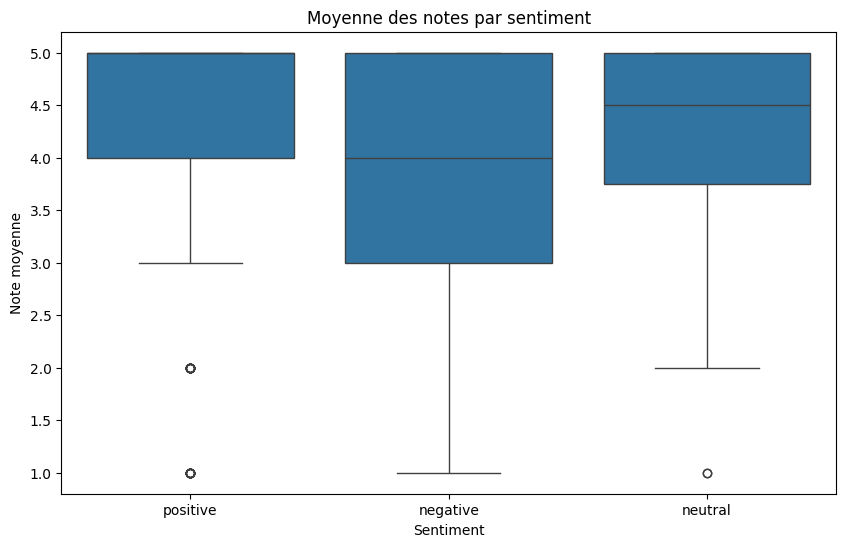

In [21]:
# Création d'un graphique pour visualiser les notes par rapport aux sentiments
plt.figure(figsize=(10, 6))

# Utiliser Seaborn pour créer un diagramme en barres
sns.boxplot(x='sentiment_tokenizer', y='rating', data=review_df)

# Personnaliser le graphique
plt.title('Moyenne des notes par sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Note moyenne')

# Afficher le graphique
plt.show()

### Preprocessing

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.util import ngrams
from nltk import pos_tag
import re

In [23]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Change to 'french' for French stopwords

# Ajouter des mots non informatifs spécifiques à la liste des stopwords
additional_non_informative_words = {'one', 'us', 'want', 'come', 'go', 'get', 'make', 'even', 'would', 'could', 'le','de','like','get','restaurant','paris','also','ever'}
stop_words = stop_words.union(additional_non_informative_words)

# Fonction pour convertir la tag POS de nltk en tag utilisable par le lemmatizer
def nltk_pos_to_wordnet_pos(nltk_pos):
    if nltk_pos.startswith('J'):
        return wordnet.ADJ
    elif nltk_pos.startswith('V'):
        return wordnet.VERB
    elif nltk_pos.startswith('N'):
        return wordnet.NOUN
    elif nltk_pos.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def preprocess_text(text):
    
    contractions = {
        "n't": " not",
        "'ve": "",
        "'s": "",
        "'m": " am",
        "'ll": " will",
        "'d": " would",
        "'re": " are",
        "'t": " not"
    }
    for contraction, replacement in contractions.items():
        text = re.sub(contraction, replacement, text.lower())
    
    # Suppression des caractères non alphanumériques et mise en minuscules
    text = re.sub(r"[^\w\s]", "", text.lower())
    
    # Tokenisation
    tokens = word_tokenize(text)
    
    # Filtrage des stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Obtention des tags POS
    nltk_pos_tags = pos_tag(tokens)
    
    # Lemmatisation
    lemmas = []
    for word, nltk_pos in nltk_pos_tags:
        wordnet_pos = nltk_pos_to_wordnet_pos(nltk_pos)
        if wordnet_pos is None:
            lemma = word  # Si aucun tag POS correspondant, le mot est laissé tel quel
        else:
            lemma = lemmatizer.lemmatize(word, pos=wordnet_pos)
        lemmas.append(lemma)
    
    # Filtrage des stopwords standard et des mots non informatifs supplémentaires
    filtered_lemmas = [lemma for lemma in lemmas if lemma not in stop_words and lemma not in additional_non_informative_words]
    

    # Création des bigrams
    bigrams_list = list(ngrams(lemmas, 2))
    # Fusion des mots dans les bigrams avec un underscore pour une meilleure lisibilité
    bigrams = ['_'.join(gram) for gram in bigrams_list]

    # Création des bigrams
    trigrams_list = list(ngrams(lemmas, 3))
    # Fusion des mots dans les bigrams avec un underscore pour une meilleure lisibilité
    trigrams = ['_'.join(gram) for gram in trigrams_list]
    
    # Concaténation des tokens et des bigrams
    return " ".join(filtered_lemmas + bigrams + trigrams)

# Imaginons que review_df['corrected_text'] contienne vos avis corrigés
# Appliquer la fonction de prétraitement sur chaque avis
review_df['preprocessed_text'] = review_df['corrected_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
review_df.head()

,business_id,review_id,text,rating,time_created,user_id,corrected_text,translated_text,label,sentiment_vader,sentiment_tokenizer,preprocessed_text
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a...",2,positive,positive,base menu present write glow review classiques...
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w,"I like this place, but it does feel a little b...",I like this place but it does feel a little bi...,2,positive,positive,place feel little bit tourist trap people din ...
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg,"If you love French onion soup, this is for you...","If you love French OnIon Soup, this is for you...",2,positive,positive,love french onion soup try stair bed love_fren...
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son inlaw his mom...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w,"Came here with my daughter, son in law, and hi...","Came here with my daughter, son inlaw his mom...",2,positive,negative,daughter son law mom gratin delicious table ex...
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...,2,positive,positive,tiny eatery along seine leave bank best burger...


In [25]:
review_df[(review_df['rating'] == 1) | (review_df['rating'] == 2)].head(10)

,business_id,review_id,text,rating,time_created,user_id,corrected_text,translated_text,label,sentiment_vader,sentiment_tokenizer,preprocessed_text
27,cSw70yMlnM0eeYo2b-WRGA,7PdebIxh9qp4oKYE4aWGdA,"Service was excellent, drinks were okay, and t...",2,2023-08-21 07:56:11,027UxK4FQCRXalz-HoKWow,"Service was excellent, the drinks were okay, a...","Service was excellent, drinks were okay, and t...",0,positive,positive,service excellent drink okay food barely mid l...
34,WHHt_Jb8Tgidn9mW7oDnIg,P2WEJlhrMCqdUbDEY5vLmQ,It closed three years ago. We walked all over...,1,2023-06-27 21:23:05,9cPSIY7fvmVdcqcet1tixg,It closed three years ago. We walked all over ...,It closed three years ago. We walked all over...,0,negative,negative,close three year ago walk look told close anot...
35,WHHt_Jb8Tgidn9mW7oDnIg,5vj46mglCUT8_jVFgO8L7g,Doesn't exist at the address listed I double a...,1,2022-07-22 12:23:01,NguGOkT5QDUwk_qkBQ0j_Q,Doesn't exist at the address listed? I double ...,Doesn't exist at the address listed I double a...,0,positive,negative,exist address list double checked google map a...
37,ijqSzadlZ9SCXvUEpMimcA,lBDf2KXJtrFLWq0LQ9gxCA,As im standing outside in this cold weather im...,1,2023-12-27 22:51:52,xnMexMFn8WBsx2B2LLjyXg,"As I am standing outside in this cold weather,...",As im standing outside in this cold weather im...,0,positive,negative,stand outside cold weather kinda frustrate wak...
49,u0PQ2A4w14iMWrrk5pWGUA,j7UIOeMdrlJ76jjlwpxa5g,RACIST and unrespectful.\r\n\r\nI ordered a 3 ...,1,2023-11-07 10:49:00,cuc7MgP1lEM6LgMbX5KzHw,I ordered a 3 course diner wine coffee that co...,RACIST and unrespectful.\r\n\r\nI ordered a 3 ...,0,negative,negative,order 3 course diner wine coffee cost 65 euro ...
59,e6RHSG0d94yzA3McN-eFxg,wNCnYnOsQhRNt0QBIMeXBA,Could not find it with directions provided. Do...,1,2023-10-01 13:38:18,Ave6QKhnZlZMPIi3P6Nu1w,Could not find it with directions provided. D...,Could not find it with directions provided. Do...,0,neutral,neutral,find direction provide still exist stay close ...
64,lTGYl3EcDKgXUhKpd7qQsw,L0YbpomUVmsmZDasgntUag,I was served a singularly mediocre Croque Mada...,2,2024-01-09 08:35:21,cmjhtZOE5Ni5bwZKH3skFQ,I was served a singularly mediocre Croque Mada...,I was served a singularly mediocre Croque Mada...,0,positive,positive,serve singularly mediocre croque madame far we...
76,sFdV05m6Pw5Rw6DdrpQlIw,EZzLbtwOWjSpCkW2f6ec5g,This was literally the first restaurant we hea...,2,2023-11-30 19:43:46,UGOjCCpSFFZkQZoLh5MRjA,This was literally the first restaurant we hea...,This was literally the first restaurant we hea...,0,negative,negative,literally first head drop luggage hotel room u...
98,_qACPRqSQ6Nvd20H8EY3uw,L0_zS5LJup3XEHa_Yf2F7g,I don't like make reviews on places that I don...,1,2023-10-15 15:47:20,RHBEH_PAHLXaX8qeAe8_gQ,I don't like to make reviews on places that I ...,I don't like make reviews on places that I don...,0,negative,negative,review place dont post good bad unfortunately ...
147,28m3vU-aLX76lMEyT3WL5Q,dc3Dle3nSRrJM0wzSWZ3Dw,I came to Paris in May and made a reservation ...,1,2023-10-02 09:32:22,UOPLEBptg7hEzGT_k6wyTw,I came to Paris in May and made a reservation ...,I came to Paris in May and made a reservation ...,0,negative,positive,may reservation month advance monday open 1900...


In [29]:
from collections import Counter
import itertools
from wordcloud import WordCloud

In [30]:
# Combiner tous les textes prétraités en une liste
all_words = list(itertools.chain(*review_df['preprocessed_text'].str.split()))

# Compter la fréquence de chaque mot/n-gram
word_freq = Counter(all_words)

# Sélectionner un certain nombre de mots les plus fréquents
num_words = 100  # par exemple, les 100 mots les plus fréquents
most_common_words = dict(word_freq.most_common(num_words))

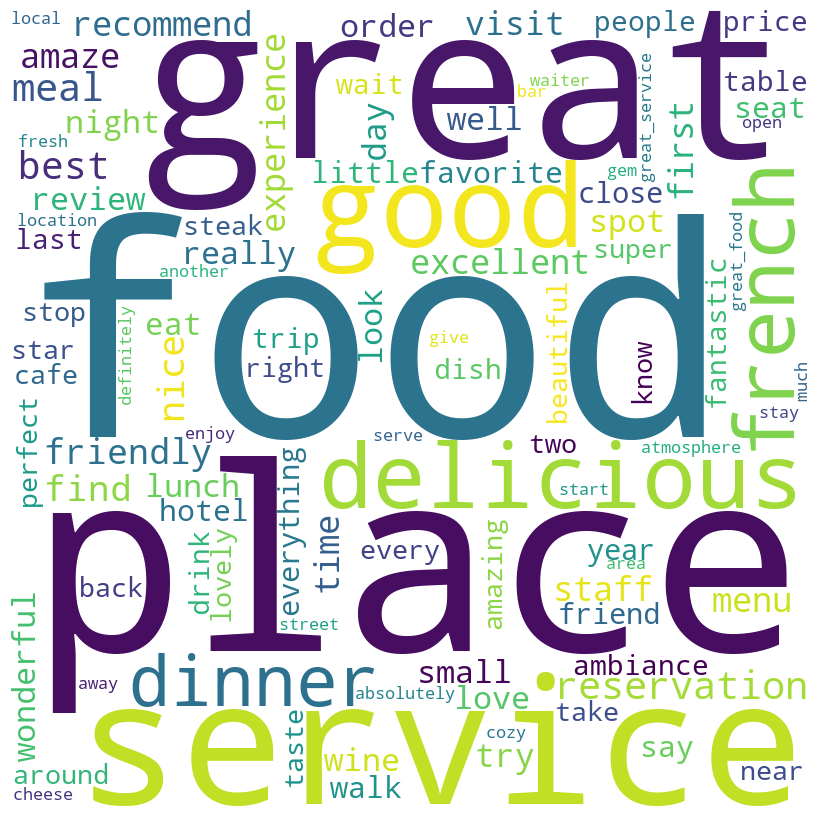

In [31]:
# Création du WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(most_common_words)

# Affichage du WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [32]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize

### LDA TOPIC MODELING

In [33]:
# Préparation des données pour LDA
# Tokenisation des avis prétraités
texts = [word_tokenize(doc) for doc in review_df['preprocessed_text']]

# Création d'un dictionnaire qui mappe chaque mot à un id unique
dictionary = corpora.Dictionary(texts)

# Filtrage des mots extrêmement rares et trop fréquents pour améliorer la qualité des topics
dictionary.filter_extremes(no_below=100, no_above=0.5, keep_n=10000)

# Transformation des documents en vecteurs de sac de mots (Bag of Words)
corpus = [dictionary.doc2bow(text) for text in texts]

# Entraînement du modèle LDA
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=4,
                     random_state=100,
                     update_every=1,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Obtenir les topics
topics = lda_model.print_topics(num_words=4)  # Changer le nombre de mots par topic si nécessaire

for topic in topics:
    print(topic)


(0, '0.376*"service" + 0.283*"delicious" + 0.238*"food" + 0.058*"great"')
(1, '0.524*"good" + 0.249*"reservation" + 0.102*"place" + 0.052*"service"')
(2, '0.367*"food" + 0.342*"place" + 0.143*"french" + 0.076*"meal"')
(3, '0.526*"great" + 0.235*"dinner" + 0.135*"best" + 0.061*"meal"')


In [34]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Activer pyLDAvis dans Jupyter Notebook (pas nécessaire si vous utilisez JupyterLab ou une autre interface)
pyLDAvis.enable_notebook()

# Préparation des données pour pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Affichage de la visualisation
pyLDAvis.display(lda_display)


In [35]:
# Inférer la distribution des topics pour chaque document
topics_per_document = lda_model.get_document_topics(corpus)

# Créer une liste pour stocker le topic dominant de chaque document
dominant_topics = []
for doc_topics in topics_per_document:
    # Trier les topics par contribution pour ce document et prendre le plus grand
    sorted_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
    dominant_topic = sorted_topics[0][0]  # (topic_num, contribution)
    dominant_topics.append(dominant_topic)

# Créez des titres descriptifs pour chaque topic identifié
topic_titles = {
    0: "Recommended about Food & Service",
    1: "Restaurant with Reservation",
    2: "French Food",
    3: "Restaurant for Dinner"
}

# Associer le titre du topic dominant à chaque document
review_df['Topic_Title'] = [topic_titles[topic] for topic in dominant_topics]

# Afficher les premières lignes du DataFrame avec les nouveaux titres de topic
review_df.head()


,business_id,review_id,text,rating,time_created,user_id,corrected_text,translated_text,label,sentiment_vader,sentiment_tokenizer,preprocessed_text,Topic_Title
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a...",2,positive,positive,base menu present write glow review classiques...,French Food
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w,"I like this place, but it does feel a little b...",I like this place but it does feel a little bi...,2,positive,positive,place feel little bit tourist trap people din ...,Restaurant with Reservation
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg,"If you love French onion soup, this is for you...","If you love French OnIon Soup, this is for you...",2,positive,positive,love french onion soup try stair bed love_fren...,French Food
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son inlaw his mom...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w,"Came here with my daughter, son in law, and hi...","Came here with my daughter, son inlaw his mom...",2,positive,negative,daughter son law mom gratin delicious table ex...,Recommended about Food & Service
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...,2,positive,positive,tiny eatery along seine leave bank best burger...,Restaurant for Dinner


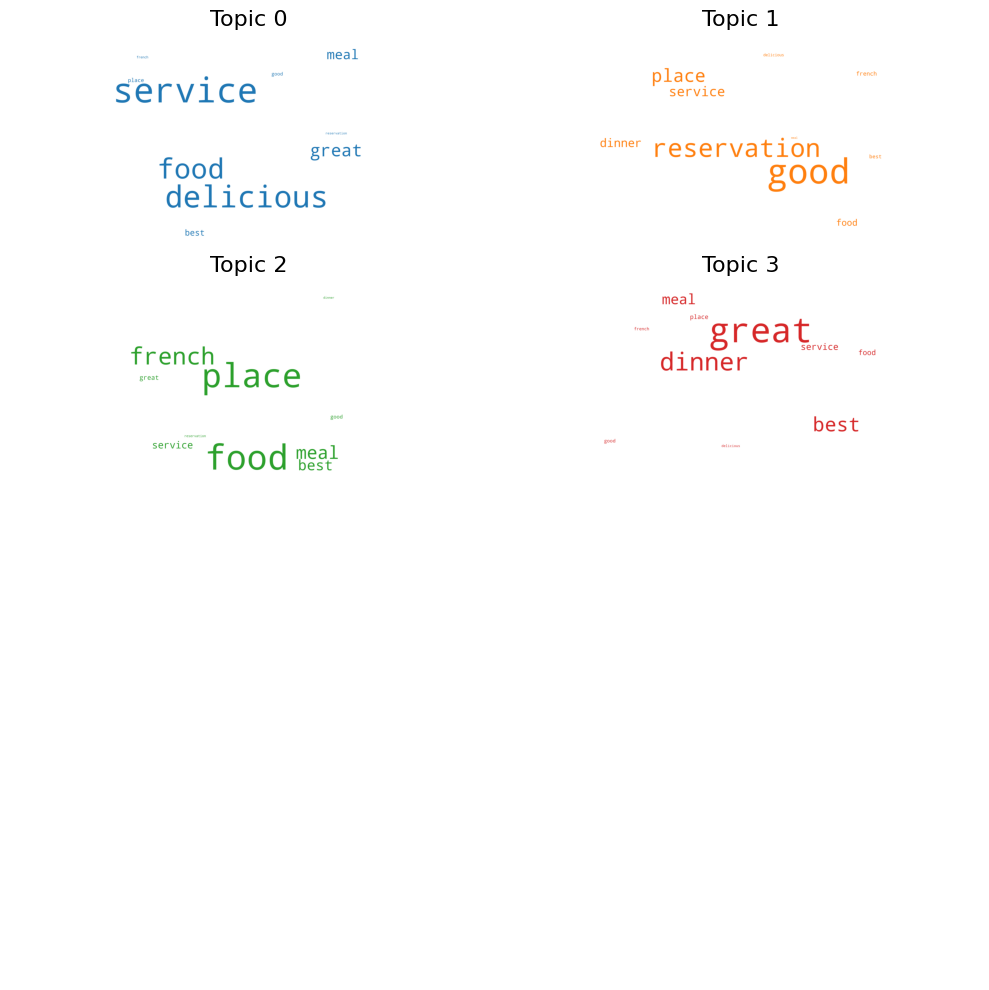

In [36]:
import matplotlib.colors as mcolors

# Génération de couleurs pour les nuages de mots
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i % len(cols)],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False, num_words=10)

# Nombre de sujets (ajustez selon votre modèle LDA)
num_topics = 4
fig, axes = plt.subplots(4, 2, figsize=(10, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i < num_topics:
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        ax.imshow(cloud)
        ax.set_title('Topic ' + str(i), fontdict=dict(size=16))
        ax.axis('off')
    else:
        ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [37]:
review_df.to_csv("review_final.csv", sep=";",index = False)

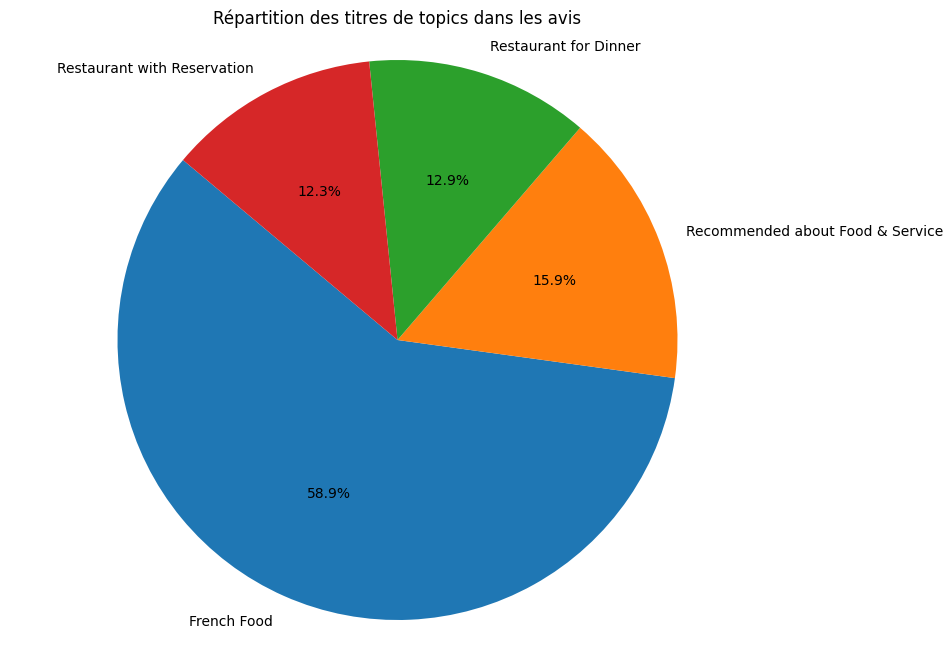

In [40]:
# Compter la fréquence de chaque titre de topic
topic_counts = review_df['Topic_Title'].value_counts()

# Créer un diagramme en camembert
plt.figure(figsize=(10, 8))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Afficher le titre et afficher le graphique
plt.title('Répartition des titres de topics dans les avis')
plt.show()

### Embedding

In [41]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Préparation des données pour Word2Vec (tokenisation a déjà été faite)
texts = [text.split() for text in review_df['preprocessed_text']]

# Entraînement du modèle Word2Vec
#w2v_model = Word2Vec(texts,vector_size=80, window=5, min_count=1, workers=2)
w2v_model = Word2Vec(texts, vector_size=80, window=10, min_count=1, workers=4, epochs=30)

# Enregistrer le modèle pour une utilisation ultérieure
w2v_model.save("word2vec_model.model")

#### Simililarité des mots (en utilisant most_similar et la distance euclidienne)

In [42]:
# Trouver des mots similaires
similar_words = w2v_model.wv.most_similar('great_meal', topn=10) 
print(similar_words)

[('french_onion_soup', 0.9962059855461121), ('super_friendly', 0.9961327314376831), ('traditional_french', 0.9959813356399536), ('pretty_good', 0.9958562254905701), ('french_onion', 0.9958540797233582), ('foie_gras', 0.9958521723747253), ('michelin_star', 0.9958450794219971), ('steak_frites', 0.9958329200744629), ('french_food', 0.9958101511001587), ('look_something', 0.9958093166351318)]


In [43]:
from scipy.spatial import distance

def euclidean_distance(word, model, top_n=10):
    word_vector = model.wv[word]
    all_word_vectors = np.array([model.wv[w] for w in model.wv.index_to_key if w != word])
    
    distances = [distance.euclidean(word_vector, wv) for wv in all_word_vectors]
    nearest_indices = np.argsort(distances)[:top_n]
    
    return [(model.wv.index_to_key[i], distances[i]) for i in nearest_indices]

# Exemple d'utilisation de la distance euclidienne
print(euclidean_distance('chocolate', w2v_model))


[('noodle', 0.12095993012189865), ('least', 0.12756741046905518), ('pleasant', 0.1354598104953766), ('tough', 0.137050062417984), ('option', 0.13851545751094818), ('good_place', 0.16140353679656982), ('discover', 0.1633572280406952), ('tight', 0.16771379113197327), ('dining', 0.169813871383667), ('positive', 0.17448465526103973)]


#### Affichage

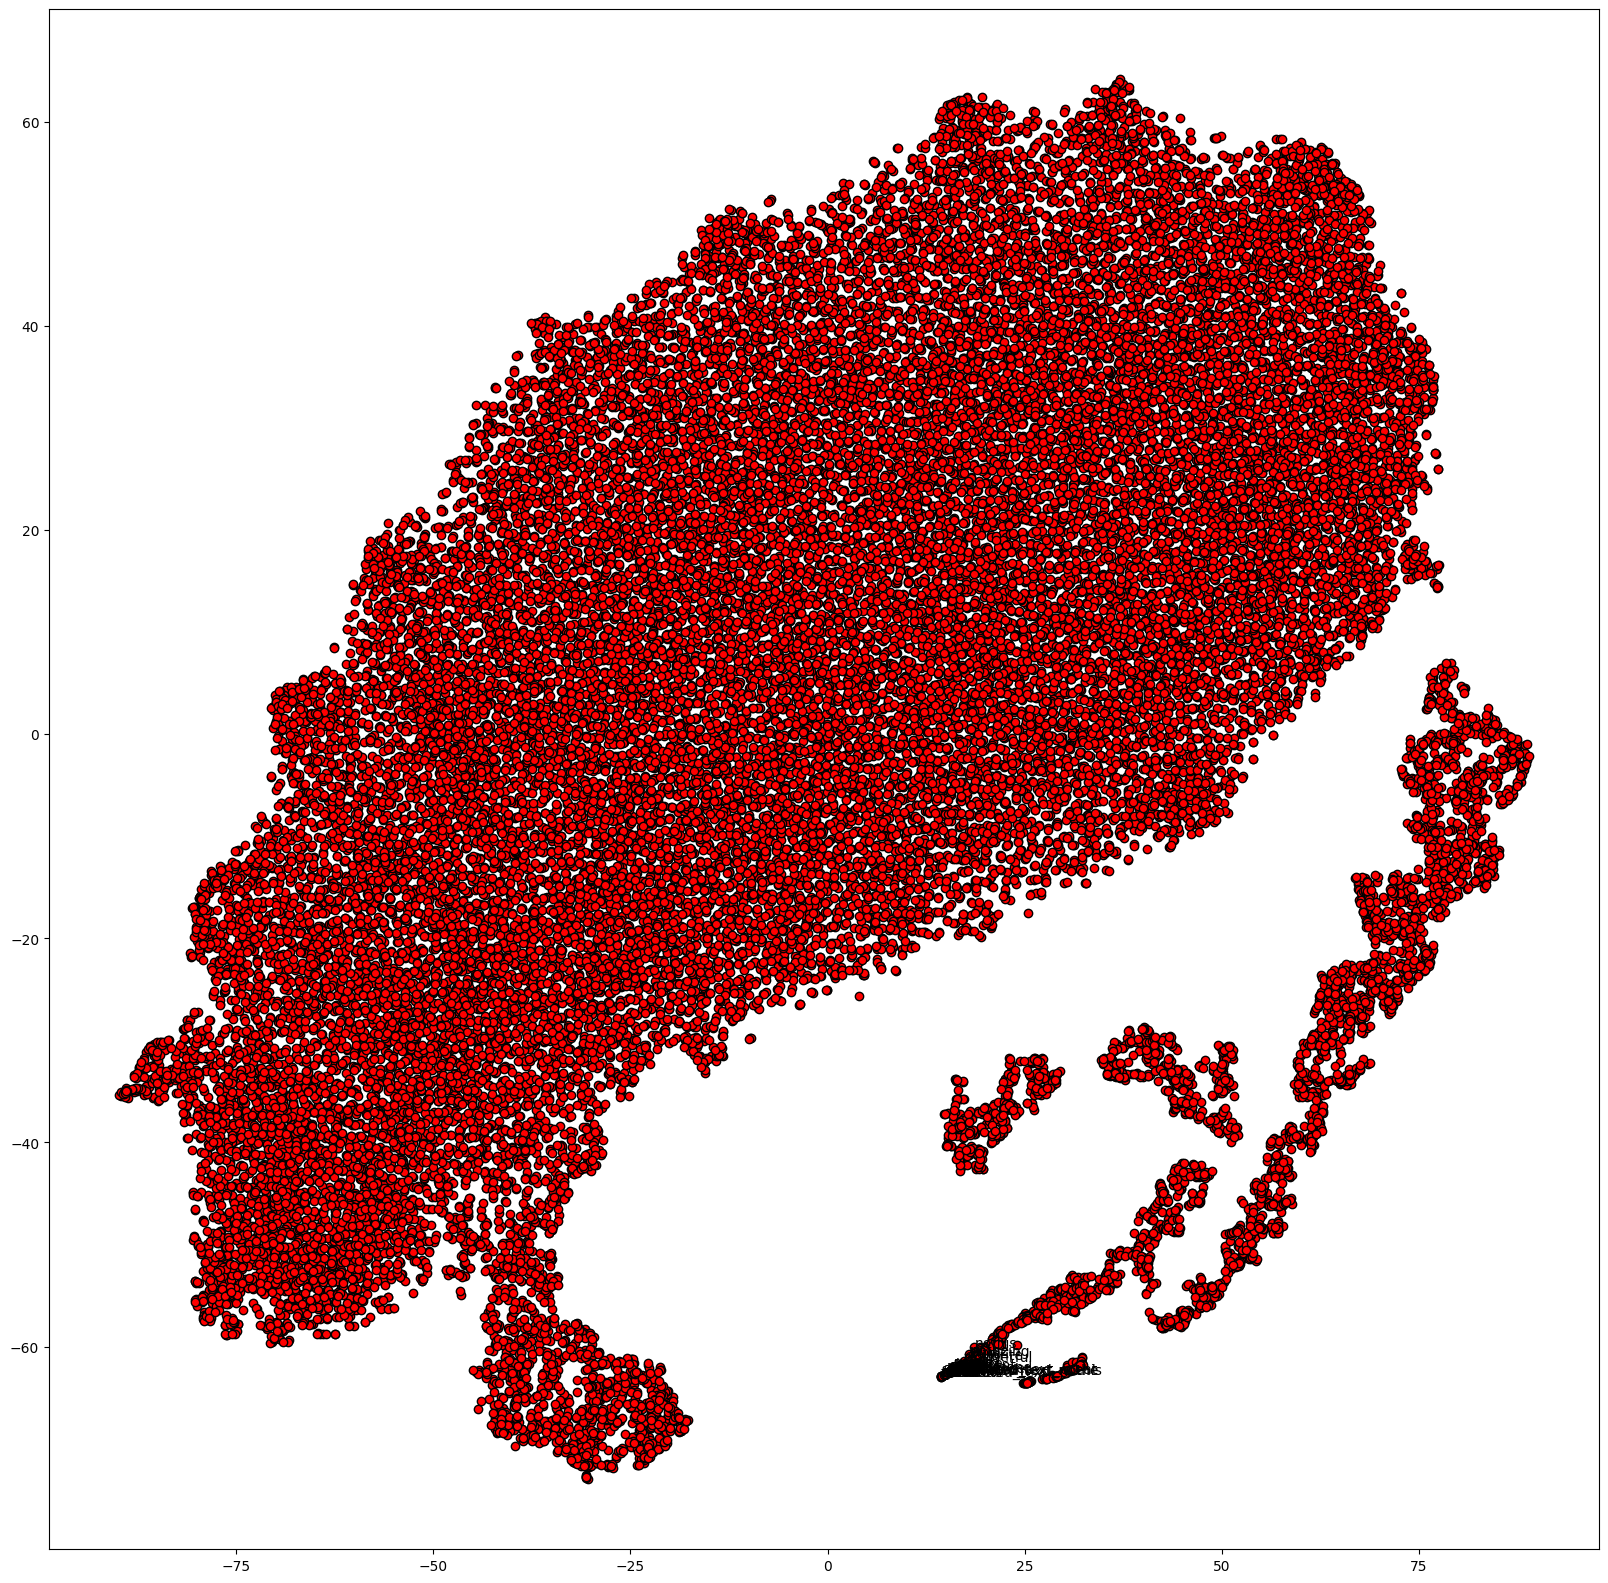

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Récupérer les vecteurs de mots et les mots correspondants du modèle
words = list(w2v_model.wv.index_to_key)
word_vectors = np.array([w2v_model.wv[word] for word in words])

# Utiliser t-SNE pour réduire la dimensionnalité
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Visualiser avec Matplotlib
plt.figure(figsize=(20, 20))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')
for i, word in enumerate(words[:50]):
    plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word)

plt.show()


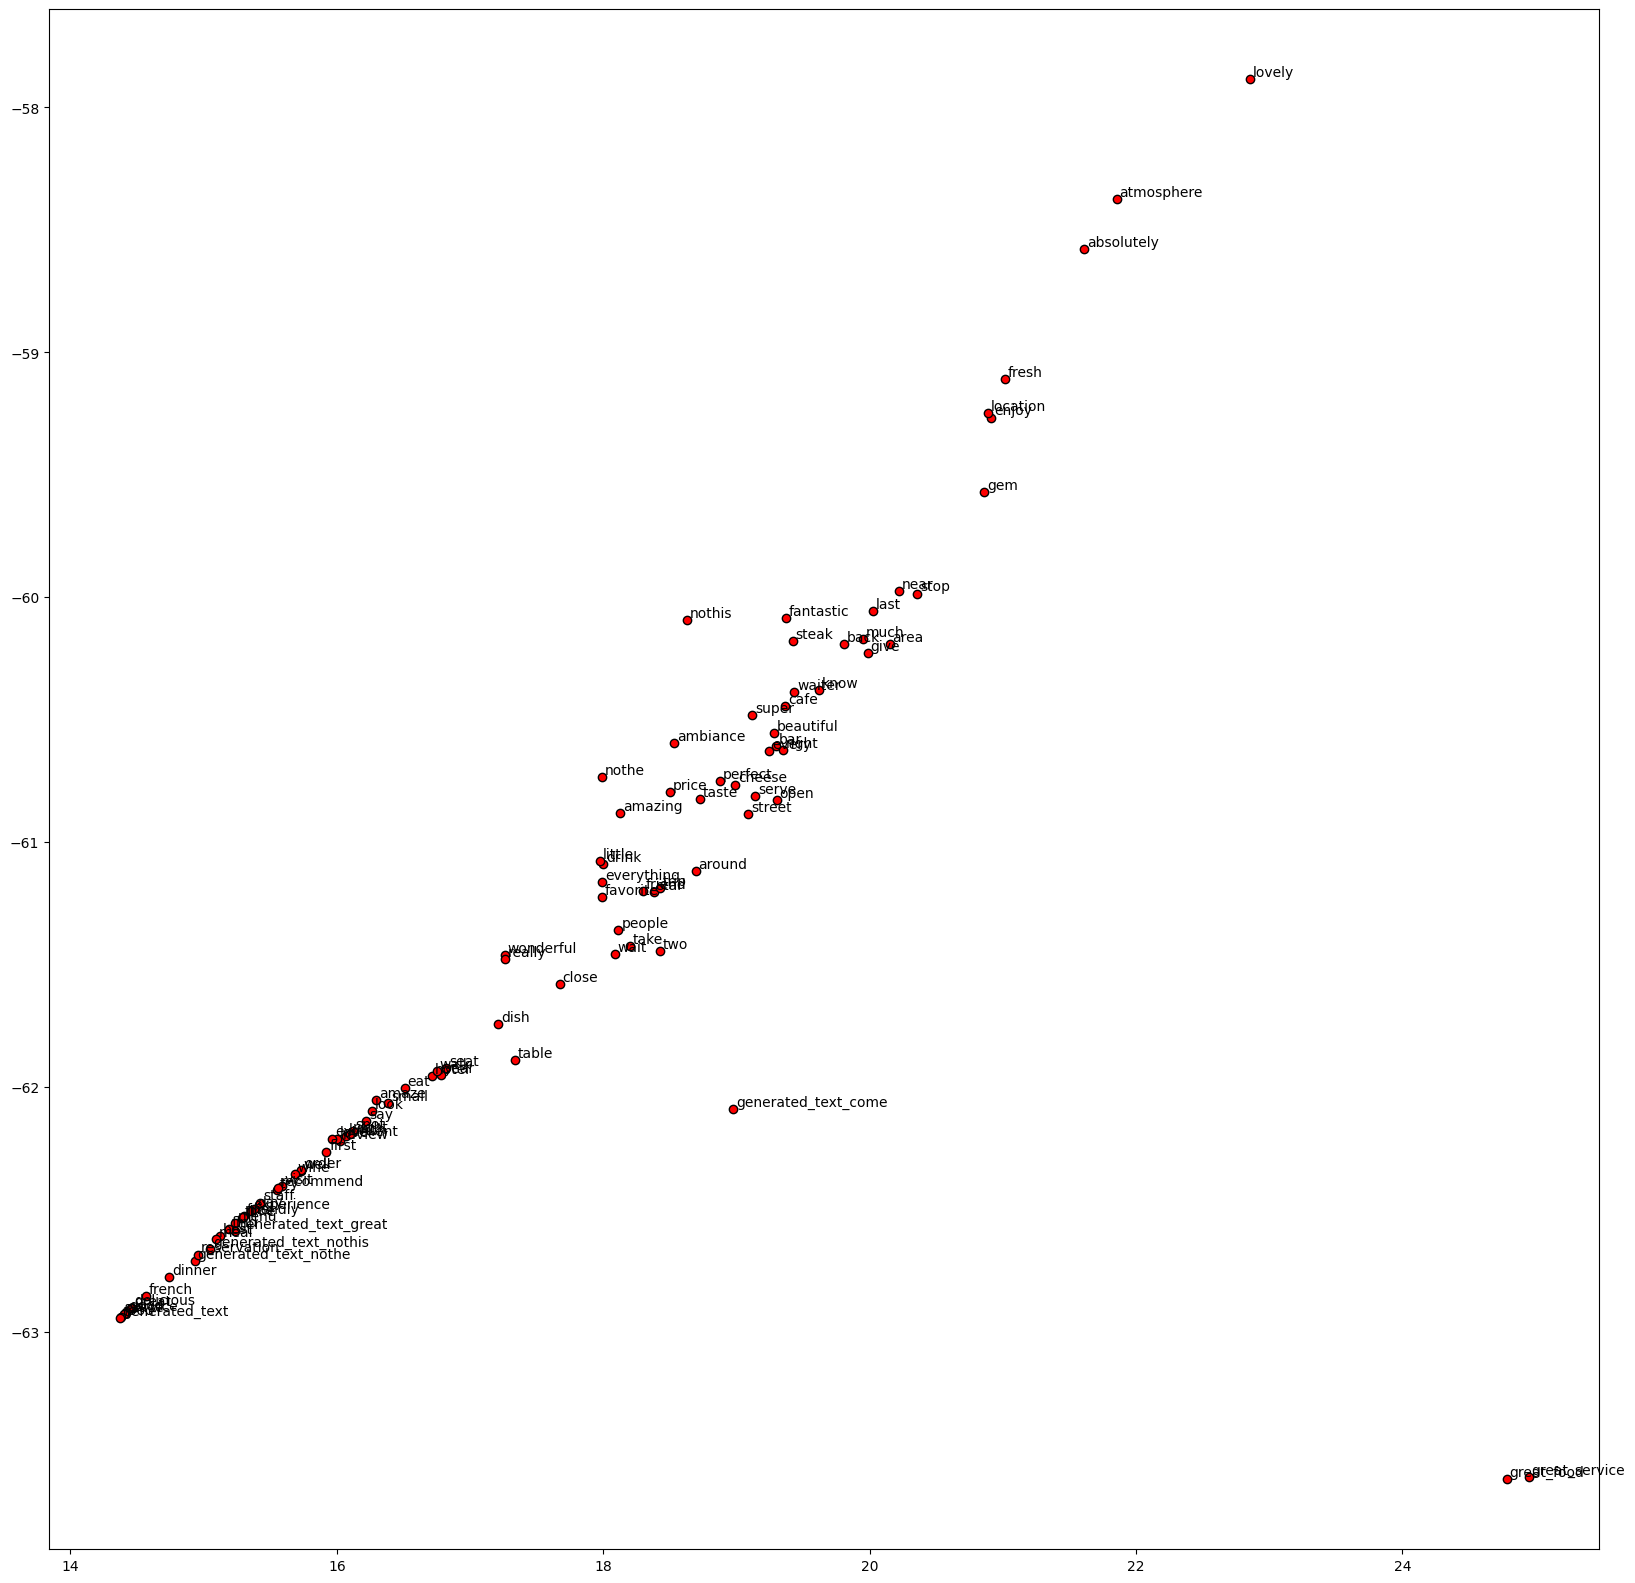

In [ ]:
# Cette fois, en utilisant une boucle pour obtenir les fréquences des mots individuels
frequent_words = w2v_model.wv.index_to_key
frequent_counts = [w2v_model.wv.get_vecattr(word, 'count') for word in frequent_words]

# Obtenez les indices des 100 mots les plus fréquents
selected_indices = np.argsort(frequent_counts)[-100:]

# Maintenant, sélectionnez les mots et leurs vecteurs correspondants pour la visualisation
selected_words = [frequent_words[i] for i in selected_indices]
selected_word_vectors = word_vectors_2d[selected_indices]

# Visualiser avec Matplotlib, en affichant uniquement un sous-ensemble de mots
plt.figure(figsize=(20, 20))
plt.scatter(selected_word_vectors[:, 0], selected_word_vectors[:, 1], edgecolors='k', c='r')
for i, word in enumerate(selected_words):
    plt.annotate(word, xy=(selected_word_vectors[i, 0], selected_word_vectors[i, 1]), xytext=(2, 2),
                 textcoords='offset points')

plt.show()


In [ ]:
import io
import os
import tensorflow as tf
from tensorboard.plugins import projector

# Path pour sauvegarder les fichiers de métadonnées (les étiquettes) et les vecteurs
log_dir = "tensorboard-logs"  
os.makedirs(log_dir, exist_ok=True)

# Exporter les étiquettes
with io.open(os.path.join(log_dir, 'metadata.tsv'), 'w', encoding='utf-8') as file_metadata:
    for word in w2v_model.wv.index_to_key:
        file_metadata.write(word + '\n')

# Paramétrage nécessaire pour TensorBoard
weights = tf.Variable(w2v_model.wv.vectors)
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# Configurer le projecteur
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)


#### Semantic Research

In [44]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

def semantic_search(query, model, texts, top_n=5):
    # Tokeniser et calculer la moyenne des vecteurs de mots pour la requête
    query_tokens = query.split()
    query_vector = average_word_vectors(query_tokens, model, set(model.wv.index_to_key), model.vector_size)
    
    # Calculer la moyenne des vecteurs de mots pour chaque document
    docs_vectors = [average_word_vectors(text.split(), model, set(model.wv.index_to_key), model.vector_size) for text in texts]
    
    # Calculer la similarité cosinus entre la requête et chaque document
    similarities = cosine_similarity([query_vector], docs_vectors).flatten()
    similar_indices = similarities.argsort()[-top_n:][::-1]
    similar_texts = [(texts[i], similarities[i]) for i in similar_indices]
    
    return similar_texts

# Exemple de recherche sémantique
query = "great food and service"
print(semantic_search(query, w2v_model, review_df['preprocessed_text'].tolist()))

[('excellent pass good moment champagne venue dallemagne merci service pleasant excellent price excellent service excellent_pass pass_good good_moment moment_champagne champagne_venue venue_dallemagne dallemagne_merci merci_service service_pleasant pleasant_excellent excellent_price price_excellent excellent_service excellent_pass_good pass_good_moment good_moment_champagne moment_champagne_venue champagne_venue_dallemagne venue_dallemagne_merci dallemagne_merci_service merci_service_pleasant service_pleasant_excellent pleasant_excellent_price excellent_price_excellent price_excellent_service', 0.9999234261678795), ('great cappuccino friendly service great location historic latin quarter great_cappuccino cappuccino_friendly friendly_service service_great great_location location_historic historic_latin latin_quarter great_cappuccino_friendly cappuccino_friendly_service friendly_service_great service_great_location great_location_historic location_historic_latin historic_latin_quarter', 

### Supervised Learning

Avec modele entrainé

In [45]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [46]:
review_df

,business_id,review_id,text,rating,time_created,user_id,corrected_text,translated_text,label,sentiment_vader,sentiment_tokenizer,preprocessed_text,Topic_Title,label_mapped
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a...",2,positive,positive,base menu present write glow review classiques...,French Food,positive
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w,"I like this place, but it does feel a little b...",I like this place but it does feel a little bi...,2,positive,positive,place feel little bit tourist trap people din ...,Restaurant with Reservation,positive
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg,"If you love French onion soup, this is for you...","If you love French OnIon Soup, this is for you...",2,positive,positive,love french onion soup try stair bed love_fren...,French Food,positive
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son inlaw his mom...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w,"Came here with my daughter, son in law, and hi...","Came here with my daughter, son inlaw his mom...",2,positive,negative,daughter son law mom gratin delicious table ex...,Recommended about Food & Service,positive
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...,2,positive,positive,tiny eatery along seine leave bank best burger...,Restaurant for Dinner,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,VO4Sq4x7ze3XkB6XMMEoEQ,GXZeMqxXPx6xCyeGs7Cz7g,The best service in Paris was at this establis...,5,2022-11-10 17:51:39,AUALDwi-U8s18TdBbHvgXA,The best service in Paris was at this establis...,The best service in Paris was at this establis...,2,positive,positive,best service establishment server superb helpf...,Restaurant for Dinner,positive
1389,VO4Sq4x7ze3XkB6XMMEoEQ,RMN0n97Va5saSRcvy5QCjw,In our two nights in Paris this was our favori...,5,2023-11-24 06:46:24,lYfPJwQLyY2otLIy0_RvqQ,The set menu is a good value for the amount an...,In our two nights in Paris this was our favori...,2,positive,positive,set menu good value amount quality food set_me...,French Food,positive
1390,9eUfq5lx6cL6E-s46VlHfg,8VHHbIL4mvmasT16LbUsaw,If I could give it no stars I would \r\nWorst ...,1,2023-12-03 11:19:44,4NexkFV97831UBm-EPgPtw,"If I could give it no stars, I would worst ser...",If I could give it no stars I would \r\nWorst ...,0,negative,negative,give star bad service experience fact felt dis...,French Food,negative
1391,9eUfq5lx6cL6E-s46VlHfg,t-gIzZINjfwHqBYsgxlcjw,Went there for dinner after Louvre. Their salm...,5,2021-07-05 09:34:43,3JRtI9YhBIK3PSjRNTVSFw,Went there for dinner after the Louvre. Their ...,Went there for dinner after Louvre. Their salm...,2,positive,positive,dinner louvre salmon ravioli good highly recom...,Restaurant with Reservation,positive


In [52]:
# Initialiser et adapter le tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(review_df['preprocessed_text'])

# Convertir les textes en séquences de nombres
sequences = tokenizer.texts_to_sequences(review_df['preprocessed_text'])

# Padding des séquences pour qu'elles aient toutes la même longueur
MAX_SEQUENCE_LENGTH = 100  # Vous pouvez ajuster cette longueur
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Créer la matrice d'embeddings
embedding_dim = 80  # Doit correspondre à la dimension de vos embeddings Word2Vec
vocab_size = len(tokenizer.word_index) + 1  # Taille du vocabulaire
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv.key_to_index:
        embedding_vector = w2v_model.wv[word]
        embedding_matrix[i] = embedding_vector

# Construire le modèle
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model.add(Flatten())  # Vous pouvez utiliser des couches LSTM ou Conv1D à la place de Flatten
model.add(Dense(3, activation='softmax'))  # 3 classes pour négatif, neutre et positif

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

labels = review_df['label'].values
model.fit(data, labels, epochs=10, validation_split=0.2)


Epoch 1/10
35/35 [==============================] - 1s 11ms/step - loss: 0.9574 - accuracy: 0.8205 - val_loss: 0.6756 - val_accuracy: 0.7849
Epoch 2/10
35/35 [==============================] - 0s 4ms/step - loss: 0.5821 - accuracy: 0.8411 - val_loss: 0.7128 - val_accuracy: 0.8351
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5834 - accuracy: 0.8492 - val_loss: 0.8681 - val_accuracy: 0.7419
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5923 - accuracy: 0.8429 - val_loss: 0.7811 - val_accuracy: 0.7921
Epoch 5/10
35/35 [==============================] - 0s 4ms/step - loss: 0.5237 - accuracy: 0.8618 - val_loss: 0.7902 - val_accuracy: 0.8136
Epoch 6/10
35/35 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.8591 - val_loss: 0.9650 - val_accuracy: 0.8674
Epoch 7/10
35/35 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.8483 - val_loss: 1.0380 - val_accuracy: 0.8459
Epoch 8/10
35/35 [=

In [53]:
# Pour l'évaluation, vous devez séparer votre ensemble de données en train et test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
31/31 [==============================] - 0s 5ms/step - loss: 0.6102 - accuracy: 0.8605 - val_loss: 0.7858 - val_accuracy: 0.7177
Epoch 2/10
31/31 [==============================] - 0s 5ms/step - loss: 0.5557 - accuracy: 0.8492 - val_loss: 0.6860 - val_accuracy: 0.8254
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.8677 - val_loss: 0.8559 - val_accuracy: 0.8206
Epoch 4/10
31/31 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8554 - val_loss: 0.8570 - val_accuracy: 0.8086
Epoch 5/10
31/31 [==============================] - 0s 4ms/step - loss: 0.4969 - accuracy: 0.8708 - val_loss: 0.8972 - val_accuracy: 0.7536
Epoch 6/10
31/31 [==============================] - 0s 5ms/step - loss: 0.4438 - accuracy: 0.8646 - val_loss: 0.9366 - val_accuracy: 0.8421
Epoch 7/10
31/31 [==============================] - 0s 4ms/step - loss: 0.5341 - accuracy: 0.8626 - val_loss: 0.9366 - val_accuracy: 0.8038
Epoch 8/10
31/31 [==

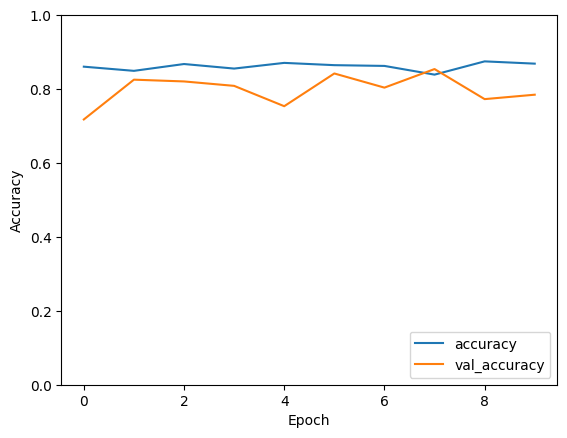

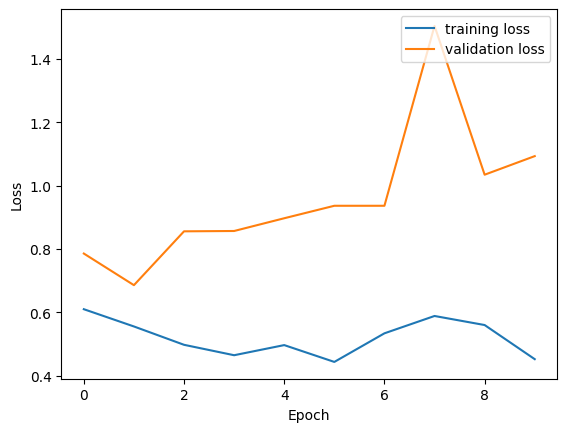

In [54]:
# Tracer la précision
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Tracer la perte
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


14/14 [==============================] - 0s 2ms/step


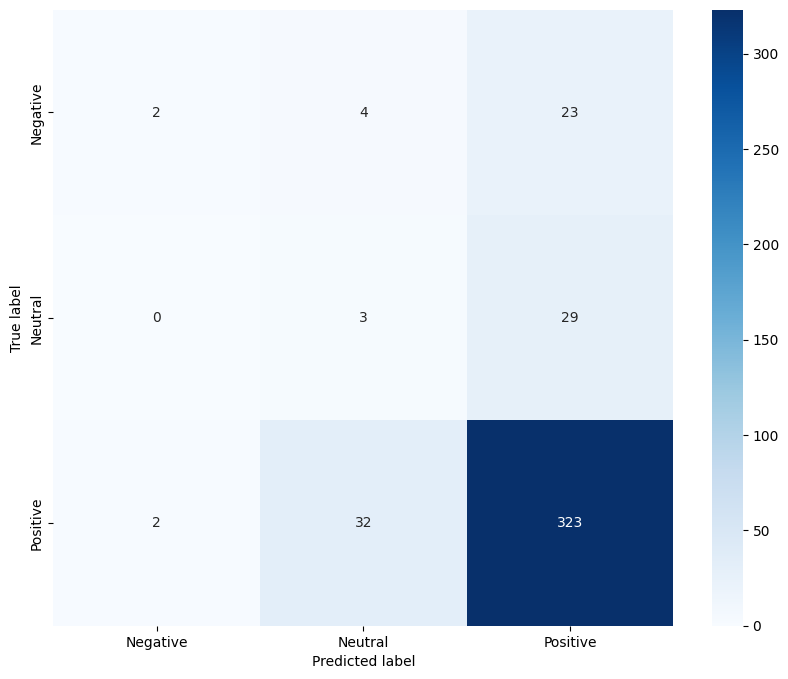

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prédictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_classes, target_names=['Negative', 'Neutral', 'Positive']))


              precision    recall  f1-score   support

    Negative       0.50      0.07      0.12        29
     Neutral       0.08      0.09      0.08        32
    Positive       0.86      0.90      0.88       357

    accuracy                           0.78       418
   macro avg       0.48      0.36      0.36       418
weighted avg       0.78      0.78      0.77       418



### Entrainement sur un dataset pris sur Kaggle 

## BERT

In [58]:
!pip install transformers torch
from transformers import pipeline
sentiment_analysis = pipeline("text-classification", model="mrcaelumn/yelp_restaurant_review_sentiment_analysis")




[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
def convert_label(label):
    if label == 'LABEL_2':
        return 2
    elif label == 'LABEL_1':
        return 1
    else:
        return 0

def apply_sentiment_batch(reviews, batch_size=64):
    batched_reviews = [reviews[i:i + batch_size] for i in range(0, len(reviews), batch_size)]
    sentiments = []
    
    for batch in batched_reviews:
        batch_results = sentiment_analysis(batch)
        # Conserver et traduire uniquement le label
        batch_sentiments = [convert_label(result['label']) for result in batch_results]
        sentiments.extend(batch_sentiments)
    
    return sentiments

# Appliquer l'analyse de sentiment sur l'ensemble des avis et traduire les labels en français
review_df['sentiment_resultsBert'] = apply_sentiment_batch(review_df['preprocessed_text'].tolist())


In [60]:
review_df.head()

,business_id,review_id,text,rating,time_created,user_id,corrected_text,translated_text,label,sentiment_vader,sentiment_tokenizer,preprocessed_text,Topic_Title,label_mapped,sentiment_resultsBert
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a...",2,positive,positive,base menu present write glow review classiques...,French Food,positive,2
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w,"I like this place, but it does feel a little b...",I like this place but it does feel a little bi...,2,positive,positive,place feel little bit tourist trap people din ...,Restaurant with Reservation,positive,2
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg,"If you love French onion soup, this is for you...","If you love French OnIon Soup, this is for you...",2,positive,positive,love french onion soup try stair bed love_fren...,French Food,positive,2
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son inlaw his mom...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w,"Came here with my daughter, son in law, and hi...","Came here with my daughter, son inlaw his mom...",2,positive,negative,daughter son law mom gratin delicious table ex...,Recommended about Food & Service,positive,2
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...,2,positive,positive,tiny eatery along seine leave bank best burger...,Restaurant for Dinner,positive,2


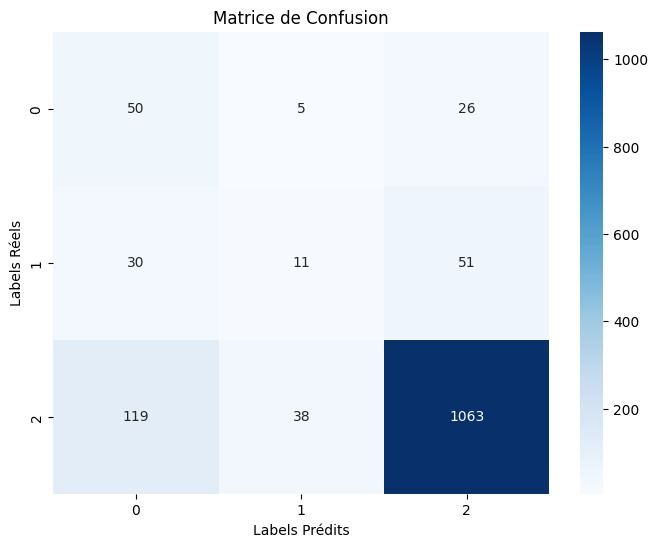

In [61]:

# Calculer la matrice de confusion
y_true = review_df['label']
y_pred = review_df['sentiment_resultsBert']
conf_matrix = confusion_matrix(y_true, y_pred) 

# Afficher la matrice de confusion
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Labels Prédits')
ax.set_ylabel('Labels Réels')
ax.set_title('Matrice de Confusion')
plt.show()

## Summarization

In [64]:
! pip install sumy

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer

def summarize_text(text, sentences_count=2):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = Summarizer()
    summary = summarizer(parser.document, sentences_count)
    return ' '.join([str(sentence) for sentence in summary])

# Regrouper les avis par 'business_id'
grouped_reviews = review_df.groupby('business_id')['translated_text'].apply(' '.join)

# Résumer les avis pour chaque restaurant
summarized_reviews = grouped_reviews.apply(lambda x: summarize_text(x, sentences_count=2))

# Créer un nouveau DataFrame pour les résumés
summarized_df = pd.DataFrame({'business_id': summarized_reviews.index, 'summary': summarized_reviews.values})


     ---------------------------------------- 0.0/97.3 kB ? eta -:--:--
     ---------------------------------------- 97.3/97.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.7/6.2 MB 22.7 MB/s eta 0:00:01
   --------- ------------------------------ 1.5/6.2 MB 19.4 MB/s eta 0:00:01
   --------------- ------------------------ 2.4/6.2 MB 18.9 MB/s eta 0:00:01
   --------------------- ------------------ 3.3/6.2 MB 19.3 MB/s eta 0:00:01
   ---------------------------- ----------- 4.4/6.2 MB 21.6 MB/s eta 0:00:01
   ------------------------------- -------- 4.8/6.2 MB 19.3 MB/s eta 0:00:01
   ------------------------------------- -- 5.9/6.2 MB 20.8 MB/s eta 0:00:01
   ---------------------------------

ERROR: Could not install packages due to an OSError: [WinError 2] Le fichier spécifié est introuvable: 'C:\\Python311\\Scripts\\chardetect.exe' -> 'C:\\Python311\\Scripts\\chardetect.exe.deleteme'


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'sumy'

In [ ]:
summarized_df.head(20)

,business_id,summary
0,-0iLH7iQNYtoURciDpJf6w,"Based on the menu presented, one could write a..."
1,-1mdkBeIyDeG-Kr4x79M6g,Considering how close it is... Great service T...
2,-CzdIyalU-Q8BL8xt_fAig,Roasted aubergine Burrata I had as a starter....
3,-JX9WdcLezp4g6Ts8SG8qg,They don't open until 7PM and... Michelin rest...
4,-NTjIQv5RSWi1N6IcGMubg,Service was also very good with knowledgeable ...
5,-YKc0e0z_47s8JeXA2feOg,They are a large menu in order to make everyon...
6,-_Inh2DBEjCCnyAUXQpjJg,Les Duex Palais became our unplanned... We cam...
7,-cSK_-y04p3oVu98DShiyQ,My brother and I had dinner here on the first ...
8,-qlUGq8Bym_Atw1xQhLzMA,Came here with friends while on vacation and f...
9,-sggfLHsfPbgXw5S6a7Jdg,Started with a nice cold bottle of Chablis to ...


In [ ]:
import random

# Sélectionner un échantillon aléatoire de résumés pour l'évaluation
sample_summaries = summarized_df.sample(n=10)  

for index, row in sample_summaries.iterrows():
    original_text = grouped_reviews[row['business_id']]
    summary = row['summary']
    print(f"Original Text:\n{original_text}\n\nSummary:\n{summary}\n\n---\n")


Original Text:
Great food, metiocre venue
The Tom yam ka soup is great
Mango salad great
Recommended Thai food in Paris... I came I saw I conquered. 
And it was GOoOoOd 

Upon entry, I was immediately greeted and sat. It wasn't crowded so that was a plus.... You wouldn't expect good Chinese food in the shadows of the Louvre Museum in Paris. This one fills the bill, offering Chinese and Vietnamese dishes at...

Summary:
It wasn't crowded so that was a plus.... You wouldn't expect good Chinese food in the shadows of the Louvre Museum in Paris. This one fills the bill, offering Chinese and Vietnamese dishes at...

---

Original Text:
We had been here once before  we were at Victoire  men isn't it nice for once to have a dedicated shop rather some pokey corner of a women's store, and... Update 4 years later this is still our favorite cafe in Paris. Had the veal and potatoes today with creme brle for dessert. Took our daughter this time,... First time visiting Paris and was looking for a pl

## Aspect Base Sentiment Analysis

In [62]:
! python -m pip install -U "setfit[absa]"
! python -m spacy download en_core_web_lg

  Using cached huggingface_hub-0.20.2-py3-none-any.whl.metadata (12 kB)
  Using cached torch-2.1.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
INFO: pip is looking at multiple versions of tokenizers to determine which version is compatible with other requirements. This could take a while.

ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'c:\\Python311\\Scripts\\get_gprof'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached transformers-4.36.2-py3-none-any.whl.metadata (126 kB)
  Using cached tokenizers-0.15.0-cp311-none-win_amd64.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/507.1 kB ? eta -:--:--
   ----- ---------------------------------- 71.7/507.1 kB ? eta -:--:--
   ------------------------------ --------- 389.1/507.1 kB 6.0 MB/s eta 0:00:01
   ---------------------------------------  501.8/507.1 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 507.1/507.1 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/84.1 kB ? eta -:--:--
   ---------------------------------------- 84.1/84.1 kB 4.9 MB/s eta 0:00:00
Using cached huggingface_hub-0.20.2-py3-none-any.whl (330 kB)
   ---------------------------------------- 0.0/75.9 kB ? eta -:--:--
   ---------------------------------------- 75.9/75.9 kB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/115.3 kB ? eta -:--:--
   --------------------------------------


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from setfit import AbsaModel

model = AbsaModel.from_pretrained(
    "tomaarsen/setfit-absa-paraphrase-mpnet-base-v2-restaurants-aspect",
    "tomaarsen/setfit-absa-paraphrase-mpnet-base-v2-restaurants-polarity"
)

C:\Users\sraps\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
# Exemple d'utilisation
example_review = ["The ambiance was lovely as well as the service , but the food was not that good."]
aspects =model.predict(example_review)
print(aspects)

[[{'span': 'ambiance', 'polarity': 'positive'}, {'span': 'service', 'polarity': 'positive'}, {'span': 'food', 'polarity': 'negative'}]]


In [ ]:
def convert_label_to_sentiment(result):
    label_to_sentiment = {
        'LABEL_0': 'négatif',
        'LABEL_1': 'neutre',
        'LABEL_2': 'positif'    }
  
    sentiment = label_to_sentiment.get(result['label'], 'neutre')  # 'neutre' par défaut si le label n'est pas reconnu
    return sentiment

# Exemple d'utilisation
example_review = "The ambiance was lovely, but the food was terrible and the service was great."
result = sentiment_analysis(example_review)  

# Afficher le sentiment au lieu du label
for res in result:
    sentiment = convert_label_to_sentiment(res)
    print(f"Sentiment: {sentiment}, Score: {res['score']}")


Sentiment: neutre, Score: 0.8762216567993164


## TFIDF + ML 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

text_preprocess=[re.sub(r"[^\w\s]", "", doc.lower() )for doc in review_df['translated_text']]
review_df['preprocessed_text2']=text_preprocess
review_df.head()

,business_id,review_id,text,rating,time_created,user_id,corrected_text,translated_text,sentiment,preprocessed_text,Topic_Title,sentiment_par_rapport_rating,sentiment_resultsBert,preprocessed_text2
0,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5,2023-12-29 23:14:16,CuqQtIpX7ZMViDuzRXxr9g,"Based on the menu presented, one could write a...","Based on the menu presented, one could write a...",positive,base menu present write glow review classiques...,French Food,2,2,based on the menu presented one could write a ...
1,-0iLH7iQNYtoURciDpJf6w,n3lGqJHkjPc6SVDHOVbSNw,I like this place but it does feel a little bi...,4,2024-01-03 09:01:14,7e7hA-2b6LJV_ywPYEUO1w,I like this place but it does feel a little bi...,I like this place but it does feel a little bi...,positive,place feel little bit tourist trap people din ...,Restaurant with Reservation,2,2,i like this place but it does feel a little bi...
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5,2023-12-14 13:59:59,DE6hz6gzrq67IYwH7Rh6Zg,"If you love French OnIon Soup, this is for you...","If you love French OnIon Soup, this is for you...",positive,love french onion soup try comptoir la gastron...,French Food,2,2,if you love french onion soup this is for you ...
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son inlaw his mom...",5,2023-09-22 09:36:00,dgBw2bNmgCDM21n7vKET1w,"Came here with my daughter, son in law, his mo...","Came here with my daughter, son inlaw his mom...",negative,daughter son law mom gratin delicious table ex...,Recommended about Food & Service,2,2,came here with my daughter son inlaw his mom ...
4,IU9_wVOGBKjfqTTpAXpKcQ,T2k7VQB-TFkzkaEXRDfwYw,This tiny eatery along the Seine on the left b...,5,2024-01-08 16:55:09,kmSmVVb_XOpYnxSq7qns8w,This tiny eatery along the Seine on the left b...,This tiny eatery along the Seine on the left b...,positive,tiny eatery along seine leave bank best burger...,Restaurant for Dinner,2,2,this tiny eatery along the seine on the left b...


C:\Users\sraps\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sraps\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sraps\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        19
      neutre       0.00      0.00      0.00        27
     positif       0.89      1.00      0.94       372

    accuracy                           0.89       418
   macro avg       0.30      0.33      0.31       418
weighted avg       0.79      0.89      0.84       418



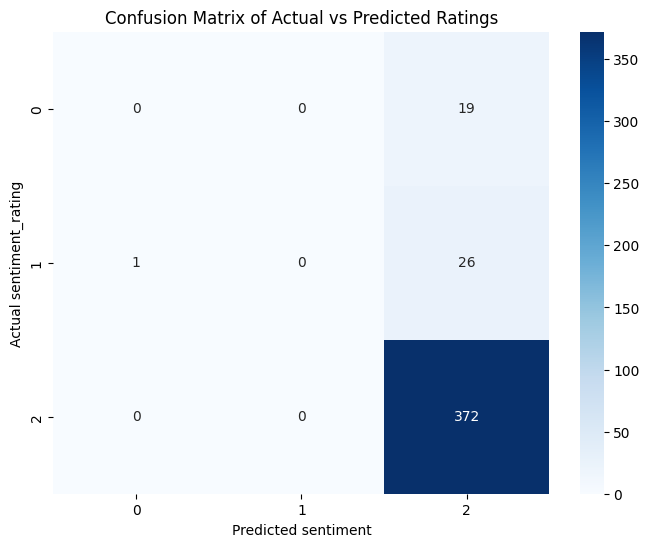

In [ ]:
from sklearn.metrics import confusion_matrix


def map_rating_to_sentiment(rating):
    if rating <= 2:
        return 'negatif'
    elif rating <= 3:
        return 'neutre'
    else:
        return 'positif'

review_df['sentiment_rating'] = review_df['rating'].apply(map_rating_to_sentiment)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(review_df['preprocessed_text2'], review_df['sentiment_rating'], test_size=0.3, random_state=123)

# Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Entraînement du modèle
model = RandomForestClassifier(random_state=123)
model.fit(X_train_tfidf, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

# Supposons que y_test et y_pred contiennent vos vrais ratings et les ratings prédits
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted sentiment')
ax.set_ylabel('Actual sentiment_rating')
ax.set_title('Confusion Matrix of Actual vs Predicted Ratings')
plt.show()

              precision    recall  f1-score   support

     negatif       0.29      0.11      0.15        19
      neutre       0.20      0.04      0.06        27
     positif       0.90      0.98      0.94       372

    accuracy                           0.88       418
   macro avg       0.46      0.38      0.39       418
weighted avg       0.83      0.88      0.85       418



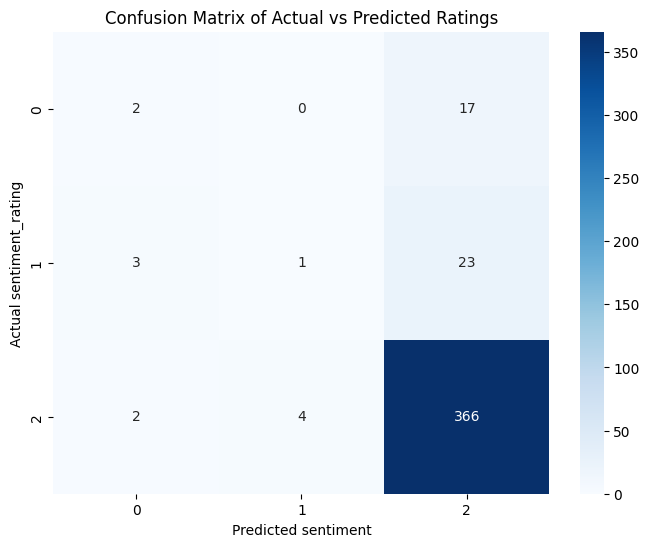

In [ ]:
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Paramètres à tester
param_grid = {
    'n_estimators': [10,50,100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Créer un modèle Random Forest
rf = RandomForestClassifier(random_state=123,class_weight='balanced_subsample')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# GridSearchCV pour trouver les meilleurs paramètres
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1_weighted')

grid_search.fit(X_train_tfidf, y_train)
best_rf = grid_search.best_estimator_

# Évaluation
y_pred = best_rf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

# Supposons que y_test et y_pred contiennent vos vrais ratings et les ratings prédits
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted sentiment')
ax.set_ylabel('Actual sentiment_rating')
ax.set_title('Confusion Matrix of Actual vs Predicted Ratings')
plt.show()

In [ ]:
#!pip install imbalanced-learn

C:\Users\sraps\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
108 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sraps\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sraps\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sraps\AppData\Local\Programs\Python\Python

              precision    recall  f1-score   support

     negatif       0.13      0.68      0.22        19
      neutre       0.28      0.19      0.22        27
     positif       0.96      0.77      0.85       372

    accuracy                           0.73       418
   macro avg       0.45      0.55      0.43       418
weighted avg       0.88      0.73      0.78       418



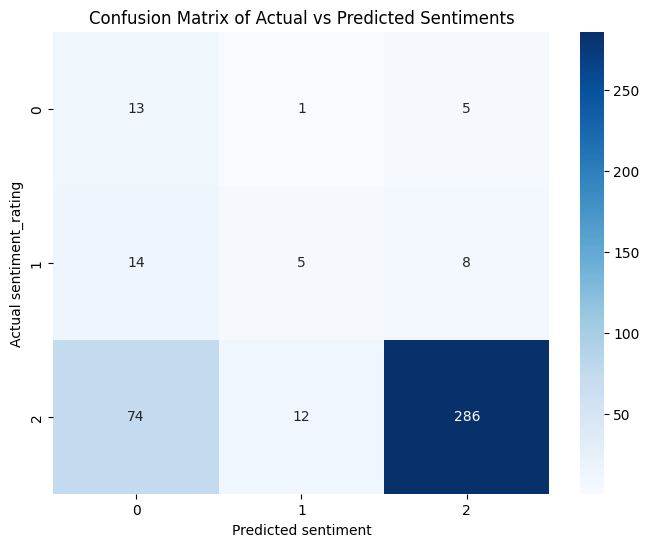

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

param_grid = {
    'n_estimators': [10, 50, 100],
    'base_estimator': [None, LogisticRegression(), SVC()],
    'sampling_strategy': ['auto', 0.5, 0.75],
    'replacement': [True, False]
}

# Easy Ensemble Classifier
easy_ensemble = EasyEnsembleClassifier(n_estimators=10, random_state=123)

# GridSearchCV
grid_search = GridSearchCV(easy_ensemble, param_grid, cv=3, n_jobs=-1, scoring='f1_weighted')
grid_search.fit(X_train_tfidf, y_train)
best_ensemble = grid_search.best_estimator_

# Prédiction et évaluation
y_pred = best_ensemble.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted sentiment')
ax.set_ylabel('Actual sentiment_rating')
ax.set_title('Confusion Matrix of Actual vs Predicted Sentiments')
plt.show()